In [9]:
# Writing Structured Programs

import nltk
from nltk import word_tokenize

In [10]:
raw = 'Red lorry, yellow lorry, red lorry, yellow lorry.'
text = word_tokenize(raw)
fdist = nltk.FreqDist(text)
sorted(fdist)
for key in fdist:
    print(key + ':', fdist[key], end='; ')

lorry: 4; ,: 3; yellow: 2; Red: 1; red: 1; .: 1; 

In [12]:
words = ['I', 'turned', 'off', 'the', 'spectroroute']
tags = ['noun', 'verb', 'prep', 'det', 'noun']

list(zip(words, tags))
[('I', 'noun'), ('turned', 'verb'), ('off', 'prep'),
('the', 'det'), ('spectroroute', 'noun')]

list(enumerate(words))

[(0, 'I'), (1, 'turned'), (2, 'off'), (3, 'the'), (4, 'spectroroute')]

In [15]:
# 90% train 10% test data

text = nltk.corpus.nps_chat.words()
cut = int(0.9 * len(text))
training_data, test_data = text[:cut], text[cut:]
text == training_data + test_data                      #True
len(training_data) / len(test_data)

9.0

In [17]:
words = 'I turned off the spectroroute'.split()
wordlens = [(len(word), word) for word in words]
wordlens.sort()
' '.join(w for (_, w) in wordlens)

'I off the turned spectroroute'

In [18]:
text = nltk.corpus.gutenberg.words('milton-paradise.txt')
longest = ''
for word in text:
    if len(word) > len(longest):
        longest = word
longest

'unextinguishable'

In [19]:
from numpy import arange
from matplotlib import pyplot

colors = 'rgbcmyk' # red, green, blue, cyan, magenta, yellow, black

def bar_chart(categories, words, counts):
    "Plot a bar chart showing counts for each word by category"
    ind = arange(len(words))
    width = 1 / (len(categories) + 1)
    bar_groups = []
    for c in range(len(categories)):
        bars = pyplot.bar(ind+c*width, counts[categories[c]], width,
                         color=colors[c % len(colors)])
        bar_groups.append(bars)
    pyplot.xticks(ind+width, words)
    pyplot.legend([b[0] for b in bar_groups], categories, loc='upper left')
    pyplot.ylabel('Frequency')
    pyplot.title('Frequency of Six Modal Verbs by Genre')
    pyplot.show()

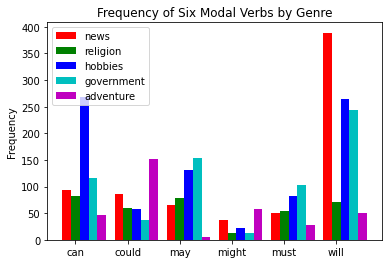

In [21]:
genres = ['news', 'religion', 'hobbies', 'government', 'adventure']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfdist = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in genres
        for word in nltk.corpus.brown.words(categories=genre)
            if word in modals)

counts = {}
for genre in genres:
    counts[genre] = [cfdist[genre][word] for word in modals]
bar_chart(genres, modals, counts)